<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/RegressorNonHDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install firebase-admin
from google.colab import drive 
drive.mount('/content/drive')
import firebase_admin
import cv2 
from firebase_admin import credentials,db 
from google.colab.patches import cv2_imshow
from sklearn.externals import joblib 
from firebase_admin import storage 
import pandas as pd 
import csv 
import json
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

In [0]:
cred = credentials.Certificate("credentials.json")

# Initialize the app with a service account, granting admin privileges
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'fir-4ca2c.appspot.com',
}, name='images_old')

IMAGE GENERATION 

In [0]:
##GETTING NAMES  -- ##Location - SSCB and DTU : Rotated images  

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imglenovo = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="lenovoinS" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      imglenovo.append("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg') 
      #print("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      ctr+=1
      print(ctr)
      
    

In [0]:
##READING THEM 

dtu=[]
sscb=[]
for img in imglenovo:
  if(img[11:16]>'07-02'):##These indicate the DTU Images - which need to be cropped and rotated 
    l=[]
    l.append(img)
    im = cv2.imread(img)
    crop = im[700:3150, 0:3120]
    crop = cv2.resize(crop, (int(np.shape(im)[1]*0.1), int(np.shape(im)[0]*0.1)))
    im = cv2.resize(crop,(256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    dtu.append(l)
  else:
    l=[]
    l.append(img)
    im = cv2.imread(img)           ##These indicate the SSCB Images - rotation only 
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
    l.append(im)
    sscb.append(l)
    
    
    

In [0]:
## CHECKING BLOCK 

print(len(dtu))
print(len(sscb))


In [0]:
##GETTING NAMES - PUNJABI BAGH 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()
count=0
imgpb = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:  
  if blob.name.split('/')[1]=="rivers.jpg" :
    ctr+=1
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5 and ctr%3==0:
        blob.download_to_filename('/content/' + "pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgpb.append("pb" + str(blob.name.split('/')[-1])+ '.jpeg') 
        #print("pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        count=ctr
        print(count)

In [0]:
##READING IMAGES - Rotated

pb=[]
for img in imgpb:
  l=[]
  l.append(img)
  im = cv2.imread(img)
  im = cv2.resize(im, (256,256))
  im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
  l.append(im)
  pb.append(l)


In [0]:
##GETTING NAMES - Location : DTU AND SHADIPUR 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgminote = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="minoteSSC" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgminote.append("minote" + str(blob.name.split('/')[-1])+ '.jpeg') 
        #print("minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        print(ctr)
      


In [0]:
##READING IMAGES - Location - SSCB and SHADIPUR ; Rotation 
shadipur = []
for img in imgminote : 
  if(img[11:16]>'07-05'):  ##Shadipur images needed rotating  
    l=[]
    l.append(img)
    im = cv2.imread(img)
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    shadipur.append(l)
  else:
    l=[]
    l.append(img)
    im = cv2.imread(img)               ##SSCB images did not need any rotating 
    im = cv2.resize(im, (256,256))
    l.append(im)
    sscb.append(l)
    

In [11]:
print(len(shadipur))
print(len(sscb))

244
1320


In [0]:


bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imgito = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:17]=="Lenovo.JPG" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "ito" + str(blob.name.split('/')[-1])+ '.jpeg')
      imgito.append("ito" + str(blob.name.split('/')[-1])+ '.jpeg') 
      #print("ito" + str(blob.name.split('/')[-1])+ '.jpeg')
      ctr+=1
      print(ctr)


In [0]:
##READING BLOCK 

ito=[]
count=0

for img in imgito:
  l=[]
  l.append(img)
  im = cv2.imread(img)
  im = cv2.resize(im,(256,256))
  im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
  l.append(im)
  ito.append(l)


In [14]:

print(np.shape(sscb))    
print(np.shape(ito))      
print(np.shape(dtu))  
print(np.shape(shadipur))     
print(np.shape(pb))   


(1320, 2)
(499, 2)
(369, 2)
(244, 2)
(161, 2)


In [0]:
cred = credentials.Certificate('/content/credentials_new.json')

##  only take the part from where the actual name starts
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'location-5f194.appspot.com',
}, name='images_diff')

In [0]:
## Reading the different locations images -- This includes 

s7_jpeg=[]
note4_jpeg=[]
minote_jpeg=[]
PatelNagarMi_jpeg=[]
gurgaonNote4_jpeg=[]


bucket = storage.bucket(app = app)
blobs = bucket.list_blobs()
ctr=0


## Reading all the LDR images 
for blob in blobs:
  if('s7' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "s7_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "s7_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      s7_jpeg.append(l) 
      print(name)
  if('note4' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "note4_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "note4_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      note4_jpeg.append(l)
      print(name)
  if('minote' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "minote_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "minote_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      minote_jpeg.append(l)
      print(name)
  if('PatelNagarMi' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "PatelNagarMi_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "PatelNagarMi_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      PatelNagarMi_jpeg.append(l)
      print(name)
  if('gurgaonNote4' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "gurgaonNote4_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "gurgaonNote4_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      gurgaonNote4_jpeg.append(l)
      print(name)


In [17]:

print(len(s7_jpeg))
print(len(note4_jpeg))
print(len(minote_jpeg))
print(len(PatelNagarMi_jpeg))
print(len(gurgaonNote4_jpeg))

94
30
80
532
184


LABEL PROCESSING 

In [0]:
with open('/content/labels_prevhour.bin','rb') as file:
  data = pickle.load(file)

In [0]:
l_s7_jpeg=data['s7_jpeg']
l_note4_jpeg=data['note4_jpeg']
l_minote_jpeg=data['minote_jpeg']
l_PatelNagarMi_jpeg=data['PatelNagarMi_jpeg']
l_gurgaonNote4_jpeg=data['gurgaonNote4_jpeg']

In [24]:
feat=[]


for img in s7_jpeg:
  #print(img[0][7:])
  for l  in l_s7_jpeg:
    #print(l[0])
    if(img[0][7:] == l[0]):
      print('s7')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2]) ##--> prev hours reading 
      feat.append(t)

for img in note4_jpeg:
  #print(img[0][10:])
  for l in l_note4_jpeg:
    #print(l[0])
    if(img[0][10:] == l[0]):
      print('note4')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2]) ##--> prev hours reading 
      feat.append(t) 
  
for img in minote_jpeg:  
  for l in l_minote_jpeg:
    if(img[0][11:] == l[0]):
      print('minote')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2]) ##--> prev hours reading 
      feat.append(t)

for img in PatelNagarMi_jpeg:
  #print(img[0][17:])
  for l  in l_PatelNagarMi_jpeg:
    #print(l[0])
    if(img[0][17:] == l[0]):
      print('PatelNagar')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2]) ##--> prev hours reading 
      feat.append(t) 

for img in gurgaonNote4_jpeg:
  #print(img[0][17:])
  for l  in l_gurgaonNote4_jpeg:
    #print(l[0])
    if(img[0][17:] == l[0]):
      print('Gurgaon')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2]) ##--> prev hours reading 
      feat.append(t) 
    


s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote

In [25]:
print(len(feat))

486


In [0]:
cred = credentials.Certificate('/content/credentials_weather.json')

##The weather data after 1st July 

# Initialize the app with a service account, granting admin privileges
new = firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://celestini-bd493.firebaseio.com/'
}, name ='w')

In [0]:
    
ref = db.reference(app=new)
df = ref.get()


In [28]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)
    

02-08-2019 24:49:49
02-08-2019 24:54:49
07-08-2019 07:57:31
07-08-2019 08:02:31
07-08-2019 08:07:31
07-08-2019 08:12:31
07-08-2019 08:17:31
07-08-2019 08:22:31
07-08-2019 08:27:31
07-08-2019 08:32:31
07-08-2019 08:37:31
07-08-2019 08:42:31
07-08-2019 08:47:31
07-08-2019 08:57:00
09-08-2019 05:41:06
09-08-2019 05:46:06
09-08-2019 05:51:06
09-08-2019 05:56:06
09-08-2019 06:01:06
09-08-2019 06:06:06
09-08-2019 06:11:06
09-08-2019 06:16:06
09-08-2019 06:21:06
09-08-2019 06:26:06
09-08-2019 06:31:06
10-08-2019 02:30:04
10-08-2019 02:35:04
10-08-2019 02:40:04
10-08-2019 02:45:04
10-08-2019 02:50:04
10-08-2019 02:55:04
16-08-2019 09:22:15
16-08-2019 09:27:15
16-08-2019 09:32:15
16-08-2019 09:37:15
16-08-2019 09:42:15
16-08-2019 09:47:15
16-08-2019 09:52:15
17-08-2019 05:15:15
17-08-2019 05:20:15
17-08-2019 05:25:15
20-08-2019 22:13:47
20-08-2019 22:18:47
20-08-2019 22:23:47
20-08-2019 22:28:47
20-08-2019 22:33:47
22-08-2019 16:58:03
22-08-2019 17:08:03
22-08-2019 17:13:03
22-08-2019 17:18:03


In [0]:
feat_a=[]
for val in feat:
  temp = val[0] 
  temp=temp.split('-')
  #print(temp)
  newtemp=temp[2].split(' ')
  #print(newtemp)
  newesttemp=newtemp[1].split(':')
  #print(newesttemp)
  j=int(newesttemp[1])
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l=[]
  l.append(final)
  l.append(val[1])
  l.append(val[2])
  l.append(val[3])
  l.append(val[4])
  l.append(val[5]) #The previous hours reading 
  feat_a.append(l)


In [0]:
weather={}
for key in temp_weather:
  temp=key.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  if(final not in weather):
    weather[final]=temp_weather[key]

In [0]:
trans=[]
cont=[]
ent=[]
hours=[]
hum=[]
pressure=[]
tempr=[]
deg=[]
speed=[]
prev=[]
pm=[]

## COMBINING 1ST 4 LOCATIONS DATA 
for e in feat_a:
  #index+=1
  for w in weather:
    if(e[0] == w):
      hours.append(float(e[0][-5:-3]))
      pm.append(float(e[4]))
      prev.append(float(e[5]))
      trans.append(e[3])
      ent.append(float(e[1]))
      cont.append(float(e[2]))
      hum.append(float(weather[w][0]))
      pressure.append(float(weather[w][1]))
      tempr.append(float(weather[w][2])) 
      deg.append(float(weather[w][4]))
      speed.append(float(weather[w][5]))
    

In [32]:
print(len(trans))
print(len(hours))
print(len(cont))
print(len(ent))
print(len(hum))
print(len(pressure))
print(len(tempr))
print(len(deg))
print(len(speed))
print(len(pm))
print(len(prev))

486
486
486
486
486
486
486
486
486
486
486


In [33]:
print(trans)
print(hours)
print(cont)
print(ent)
print(hum)
print(pressure)
print(tempr)
print(deg)
print(speed)
print(pm)
print(prev)

[1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 5, 0.9959810172352763, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [0]:
##SSCB 
df = pd.read_csv('/content/sscb_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/sscb_labels_new.csv')

k=0
cpcb=[]
val = '61'
with open('/content/sscb_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      l.append(val)
      if(k%5==0):
        val=row[3]
      cpcb.append(l) 

In [35]:
print(cpcb)

[['27-06-2019 00:00', '61', '61'], ['27-06-2019 00:15', '61', '61'], ['27-06-2019 00:30', '61', '61'], ['27-06-2019 00:45', '61', '61'], ['27-06-2019 01:00', '53', '61'], ['27-06-2019 01:15', '53', '61'], ['27-06-2019 01:30', '53', '61'], ['27-06-2019 01:45', '53', '53'], ['27-06-2019 02:00', '68', '53'], ['27-06-2019 02:15', '68', '53'], ['27-06-2019 02:30', '68', '53'], ['27-06-2019 02:45', '68', '53'], ['27-06-2019 03:00', '72', '68'], ['27-06-2019 03:15', '72', '68'], ['27-06-2019 03:30', '72', '68'], ['27-06-2019 03:45', '72', '68'], ['27-06-2019 04:00', '69', '68'], ['27-06-2019 04:15', '69', '69'], ['27-06-2019 04:30', '69', '69'], ['27-06-2019 04:45', '69', '69'], ['27-06-2019 05:00', '73', '69'], ['27-06-2019 05:15', '73', '69'], ['27-06-2019 05:30', '73', '73'], ['27-06-2019 05:45', '73', '73'], ['27-06-2019 06:00', '161', '73'], ['27-06-2019 06:15', '161', '73'], ['27-06-2019 06:30', '161', '73'], ['27-06-2019 06:45', '161', '161'], ['27-06-2019 07:00', '103', '161'], ['27-0

In [0]:
##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in sscb:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)  
  
  

In [0]:
feat=[]
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      im = date[2]
      imc = date[2]
      imc = cv2.resize(imc, (64,64))
      l=[]
      l.append(val[0])
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(val[2])
      l.append(trans_deg(im))
      feat.append(l)
   

In [38]:
print(feat)

[['27-06-2019 16:00', 5.071457862854004, 2.468056791148552, '47', '47', 1], ['27-06-2019 16:00', 40.19698715209961, 59.820981855775706, '47', '47', 1], ['27-06-2019 16:45', 41.98408126831055, 60.822207739303735, '47', '47', 2], ['27-06-2019 16:45', 5.048366069793701, 2.470456806162675, '47', '47', 1], ['27-06-2019 16:45', 42.25675964355469, 62.17865647994067, '47', '47', 2], ['27-06-2019 16:45', 45.038902282714844, 57.058971414239934, '47', '47', 1], ['27-06-2019 17:00', 38.31585693359375, 63.26486441079081, '45', '47', 1], ['27-06-2019 17:00', 42.740291595458984, 64.30904471374883, '45', '47', 2], ['27-06-2019 17:00', 42.78096389770508, 64.38469555959436, '45', '47', 2], ['27-06-2019 17:00', 42.9442253112793, 65.99889562145044, '45', '47', 1], ['27-06-2019 17:15', 40.31647491455078, 66.20686853553428, '45', '47', 1], ['27-06-2019 17:15', 40.947696685791016, 68.67146570323897, '45', '47', 1], ['27-06-2019 17:15', 46.86836624145508, 58.86145451756276, '45', '47', 1], ['27-06-2019 17:15'

In [0]:

df = pd.read_csv('/content/dtu_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/dtu_labels_new.csv')
k=0

cpcb=[]



val ='46.11'
with open('/content/dtu_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      l.append(val)
      if(k%5==0):
        val=row[3]
      cpcb.append(l) 

In [40]:
print(cpcb)

[['01-07-2019 00:00', '46.11', '46.11'], ['01-07-2019 00:15', '46.76', '46.11'], ['01-07-2019 00:30', '46.76', '46.76'], ['01-07-2019 00:45', '46.76', '46.76'], ['01-07-2019 01:00', '56.33', '46.76'], ['01-07-2019 01:15', '57.48', '46.76'], ['01-07-2019 01:30', '57.48', '46.76'], ['01-07-2019 01:45', '57.48', '57.48'], ['01-07-2019 02:00', '54.79', '57.48'], ['01-07-2019 02:15', '54.44', '57.48'], ['01-07-2019 02:30', '54.44', '57.48'], ['01-07-2019 02:45', '54.44', '57.48'], ['01-07-2019 03:00', '77.9', '54.44'], ['01-07-2019 03:15', '80.95', '54.44'], ['01-07-2019 03:30', '80.95', '54.44'], ['01-07-2019 03:45', '80.95', '54.44'], ['01-07-2019 04:00', '58.53', '54.44'], ['01-07-2019 04:15', '55.88', '58.53'], ['01-07-2019 04:30', '55.88', '58.53'], ['01-07-2019 04:45', '55.88', '58.53'], ['01-07-2019 05:00', '53.05', '58.53'], ['01-07-2019 05:15', '52.72', '58.53'], ['01-07-2019 05:30', '52.72', '52.72'], ['01-07-2019 05:45', '52.72', '52.72'], ['01-07-2019 06:00', '60.8', '52.72'], [

In [0]:
##TIMESTAMP MODIFICATION 


m_tmp=[]
for tmp in dtu:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)  
  

In [0]:

for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      im = date[2]
      l=[]
      l.append(val[0])
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(val[2])
      l.append(trans_deg(im))
      #print('   -   -  ' + str(l))
      feat.append(l)
      

In [0]:
## PUNJABI BAGH 

df = pd.read_csv('/content/pb_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/labels_pb_new.csv')


k=0
cpcb=[]
val ='54.4'
with open('/content/labels_pb_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      l.append(val)
      if(k%5==0):
        val=row[3]
      cpcb.append(l) 

In [44]:
print(cpcb)

[['03-07-2019 00:15', '54.4', '54.4'], ['03-07-2019 00:30', '53.6', '54.4'], ['03-07-2019 00:45', '53.6', '53.6'], ['03-07-2019 01:00', '54.6', '53.6'], ['03-07-2019 01:15', '55.5', '53.6'], ['03-07-2019 01:30', '56.2', '53.6'], ['03-07-2019 01:45', '56.8', '53.6'], ['03-07-2019 02:00', '57.1', '56.8'], ['03-07-2019 02:15', '57.3', '56.8'], ['03-07-2019 02:30', '57.2', '56.8'], ['03-07-2019 02:45', '56.9', '56.8'], ['03-07-2019 03:00', '56.2', '56.8'], ['03-07-2019 03:15', '56.2', '56.2'], ['03-07-2019 03:30', '56.3', '56.2'], ['03-07-2019 03:45', '56.9', '56.2'], ['03-07-2019 04:00', '57.3', '56.2'], ['03-07-2019 04:15', '57.2', '56.2'], ['03-07-2019 04:30', '56.8', '57.2'], ['03-07-2019 04:45', '57.1', '57.2'], ['03-07-2019 05:00', '57.8', '57.2'], ['03-07-2019 05:15', '58.5', '57.2'], ['03-07-2019 05:30', '59', '57.2'], ['03-07-2019 05:45', '59.1', '59'], ['03-07-2019 06:00', '58.8', '59'], ['03-07-2019 06:15', '58.5', '59'], ['03-07-2019 06:30', '58.3', '59'], ['03-07-2019 06:45', 

In [0]:
##TIMESTAMP MODIFICATION 

m_tmp=[]
for tmp in pb:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)   

In [0]:

for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      #print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(val[2])
      l.append(trans_deg(im))
      #print('   -   -  ' + str(l))
      feat.append(l)

In [47]:

print(feat)

[['27-06-2019 16:00', 5.071457862854004, 2.468056791148552, '47', '47', 1], ['27-06-2019 16:00', 40.19698715209961, 59.820981855775706, '47', '47', 1], ['27-06-2019 16:45', 41.98408126831055, 60.822207739303735, '47', '47', 2], ['27-06-2019 16:45', 5.048366069793701, 2.470456806162675, '47', '47', 1], ['27-06-2019 16:45', 42.25675964355469, 62.17865647994067, '47', '47', 2], ['27-06-2019 16:45', 45.038902282714844, 57.058971414239934, '47', '47', 1], ['27-06-2019 17:00', 38.31585693359375, 63.26486441079081, '45', '47', 1], ['27-06-2019 17:00', 42.740291595458984, 64.30904471374883, '45', '47', 2], ['27-06-2019 17:00', 42.78096389770508, 64.38469555959436, '45', '47', 2], ['27-06-2019 17:00', 42.9442253112793, 65.99889562145044, '45', '47', 1], ['27-06-2019 17:15', 40.31647491455078, 66.20686853553428, '45', '47', 1], ['27-06-2019 17:15', 40.947696685791016, 68.67146570323897, '45', '47', 1], ['27-06-2019 17:15', 46.86836624145508, 58.86145451756276, '45', '47', 1], ['27-06-2019 17:15'

In [0]:

## SHADIPUR 

df_ = pd.read_csv('/content/shadipur_labels.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/shadipur_labels_new.csv')


k=0
cpcb=[]
val ='67.11 '
with open('/content/shadipur_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      l.append(val)
      if(k%5==0):
        val=row[3]
      cpcb.append(l) 

In [0]:

##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in shadipur:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l) 
 

In [0]:

for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      #print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(val[2])
      l.append(trans_deg(im))
      #print('   -   -  ' +str(l))
      feat.append(l)

In [0]:
# ITO 
df_ = pd.read_csv('/content/ito_labels.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/ito_labels_new.csv')


k=0
cpcb=[]
val ='104 '
with open('/content/ito_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      l.append(val)
      if(k%5==0):
        val=row[3]
      cpcb.append(l) 

In [0]:
#TIMESTAMP MODIFICATION 
m_tmp=[]
for t in ito:
  l=[]
  temp=t[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(t[0])
  l.append(final)
  l.append(t[1])
  m_tmp.append(l) 

In [0]:
ito_tomatch=[]
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      #print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(np.ndarray.flatten(transmission(im)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(val[2])
      l.append(trans_deg(im))
      ito_tomatch.append(l)

In [57]:
print(len(feat))

1930


Till here the feat for all 5 delhi locations is done 
now combining the shanghai data LABELS 


WEATHER DATA 

In [0]:
cred = credentials.Certificate('credentials.json')

# Initialize the app with a service account, granting admin privileges
ito_n = firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://fir-4ca2c.firebaseio.com/'
},name = 'w_ito_n')

In [0]:
    
ref = db.reference(app=ito_n)
df = ref.get()


In [60]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)

02-08-2019 24:45:42
02-08-2019 24:50:42
02-08-2019 24:55:42
02-08-2019 24:60:42
07-08-2019 08:05:56
07-08-2019 08:10:56
07-08-2019 08:15:56
07-08-2019 08:20:56
07-08-2019 08:25:56
07-08-2019 08:30:56
07-08-2019 08:35:56
07-08-2019 08:40:56
07-08-2019 08:45:56
07-08-2019 08:50:56
08-07-2019 02:52:50
08-07-2019 02:57:50
09-08-2019 05:45:16
09-08-2019 05:50:16
09-08-2019 05:55:16
09-08-2019 05:60:16
09-08-2019 06:05:16
09-08-2019 06:10:16
09-08-2019 06:15:16
09-08-2019 06:20:16
09-08-2019 06:25:16
10-08-2019 02:33:38
10-08-2019 02:38:38
10-08-2019 02:43:38
10-08-2019 02:48:38
10-08-2019 02:53:38
10-08-2019 03:03:38
13-07-2019 12:43:49
16-08-2019 09:25:14
16-08-2019 09:30:14
16-08-2019 09:35:14
16-08-2019 09:40:14
16-08-2019 09:45:14
16-08-2019 09:50:14
16-08-2019 09:55:14
17-08-2019 05:15:28
17-08-2019 05:20:28
20-08-2019 22:15:56
20-08-2019 22:20:56
20-08-2019 22:25:56
20-08-2019 22:30:56
22-08-2019 17:01:14
22-08-2019 17:06:14
22-08-2019 17:11:14
22-08-2019 17:16:14
22-08-2019 17:21:14


In [0]:
## COMBINING ITO DATA 

with open('/content/past-weather (1) (3).json') as file:
  data = json.load(file)
  source = data['data']['weather']


In [0]:
## MATCHING ITO DATA 

hour_i=[]
pres_i=[]
temp_i=[]
deg_i=[]
speed_i=[]

ito_weather=[]

with open('/content/past-weather (1) (3).json') as file:
  data = json.load(file)
  source = data['data']['weather']
  
  for i in source:
    for j in range(0,24):
      date = i['date']
      date = date.split(' ')
      date = date[0]
      t = date.split('-')
      t = t[2]+'-'+t[1]+'-'+t[0]
      if(len(str(j))==1):
        key = t + ' ' + '0' +str(j) + ':00' 
      else:
        key = t + ' ' +str(j) + ':00'
      l=[]
      l.append(key)
      l.append(i['hourly'][j]['humidity'])
      l.append(i['hourly'][j]['tempC'])
      l.append(i['hourly'][j]['windspeedKmph'])
      l.append(i['hourly'][j]['winddirDegree'])
      l.append(i['hourly'][j]['pressure'])
      ito_weather.append(l)
     

In [0]:
weather={}
for key in temp_weather:
  temp=key.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  if(final not in weather):
    weather[final]=temp_weather[key]
  
  

In [64]:
print(len(feat))

1930


In [0]:


## COMBINING 1ST 4 LOCATIONS DATA 
for e in feat:
  for w in weather:                             
    if(e[0] == w):
      hours.append(float(e[0][-5:-3]))
      pm.append(float(e[3]))
      trans.append(e[5])
      prev.append(e[4])
      ent.append(float(e[1]))
      cont.append(float(e[2]))
      hum.append(float(weather[w][0]))
      pressure.append(float(weather[w][1]))
      tempr.append(float(weather[w][2])) 
      deg.append(float(weather[w][4]))
      speed.append(float(weather[w][5]))


In [0]:

for e in ito_tomatch:
  for w in ito_weather: 
    if(e[0] == w[0]):
      hours.append(e[0][-5:-3])
      trans.append(e[5])
      prev.append(e[4])
      ent.append(e[1])
      cont.append(e[2])
      pm.append(e[3])
      hum.append(w[1])
      tempr.append(w[2])
      speed.append(w[3]) 
      deg.append(w[4])
      pressure.append(w[5])

  

In [67]:
print(len(trans))
print(len(hours))
print(len(cont))
print(len(ent))
print(len(hum))
print(len(pressure))
print(len(tempr))
print(len(deg))
print(len(speed))
print(len(prev))

2539
2539
2539
2539
2539
2539
2539
2539
2539
2539


In [0]:
prev = list(map(float,prev))

In [69]:
print(trans)
print(hours)
print(cont)
print(ent)
print(hum)
print(pressure)
print(tempr)
print(deg)
print(speed)
print(pm)


[1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 5, 0.9959810172352763, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [0]:
final_shape=len(hours)

#FEATURES 

trans= np.reshape(trans,(final_shape,1))
hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
tempr = np.reshape(tempr,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
prev = np.reshape(prev,(final_shape,1))


features = np.hstack((hours, cont, ent , hum, tempr, deg, speed, pressure,trans,prev))


#LABELS

pm = np.reshape(pm,(final_shape,1))

##SCALING FEATURES 

s1 = MinMaxScaler()
hours = s1.fit_transform(hours)
s2 = MinMaxScaler()
cont = s2.fit_transform(cont)
s3 = MinMaxScaler()
ent = s3.fit_transform(ent)
s4 = MinMaxScaler()
hum = s4.fit_transform(hum)
s5 = MinMaxScaler()
pressure = s5.fit_transform(pressure)
s6 = MinMaxScaler()
tempr = s6.fit_transform(tempr)
s7 = MinMaxScaler()
deg = s7.fit_transform(deg)
s8 = MinMaxScaler()
speed = s8.fit_transform(speed)
s9 = MinMaxScaler()
prev = s9.fit_transform(prev)



features = np.hstack((hours, cont, ent , hum, tempr, deg, speed, pressure,trans,prev))


In [0]:
## FINAL FEATURES AND LABELS 

features = list(map(np.float32,features))
pm = list(map(np.float32,pm))

In [0]:
with open('/content/NonHDR_Features.bin','wb') as file:
  pickle.dump(features,file)
with open('/content/NonHDR_Labels.bin','wb') as file:
  pickle.dump(pm,file)

## Linear Regressor 

9.116722


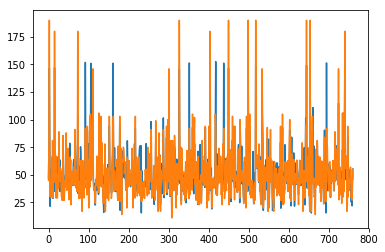

In [73]:
lineareg = LinearRegression(normalize =False)
cross = cross_val_score(lineareg, features,pm, scoring ='neg_mean_absolute_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.3, random_state =42)


lineareg.fit(x_train, y_train)

pred = lineareg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_absolute_error(pred, y_test))



In [0]:
##RUN THIS IF YOU WANT TO SAVE THE MODEL FOR LATER 

with open('/content/LR_Final.bin','wb') as file:
  pickle.dump(lineareg,file)



In [75]:
##PRINTING CROSS VALIDATION SCORES 
print(((-1)*cross))

[14.69631577  8.14290905 18.82621384]


In [76]:
##RUN THIS TO CHECK PREDICTED VS ACTUAL VALUES 
d=[]
for i in range(0,len(pred)):
  print(str(y_test[i]) +'\t'+ str(pred[i]))
  k=y_test[i]-pred[i]
  if(k>=20):
    d.append(k)


[45.]	[46.998997]
[81.19]	[77.71945]
[190.]	[146.68483]
[57.39]	[77.503815]
[30.]	[21.49612]
[44.]	[39.46359]
[44.]	[54.53649]
[30.]	[32.35189]
[66.]	[55.52776]
[30.]	[32.41134]
[81.1]	[62.841656]
[29.]	[28.715454]
[63.]	[45.221924]
[43.01]	[50.278988]
[44.]	[35.12309]
[180.]	[147.08545]
[56.]	[45.955204]
[62.]	[56.045616]
[60.]	[50.049217]
[29.]	[31.68405]
[66.88]	[57.80295]
[35.]	[42.915455]
[29.]	[65.8079]
[41.]	[42.06461]
[50.]	[54.92473]
[38.]	[43.871033]
[89.]	[70.73479]
[46.]	[43.929256]
[57.]	[63.663628]
[44.]	[34.942265]
[56.]	[53.651997]
[44.]	[43.243195]
[32.]	[37.2628]
[29.]	[36.59324]
[27.]	[31.30114]
[29.]	[33.63701]
[85.7]	[75.81802]
[27.]	[29.29793]
[44.]	[42.0532]
[27.]	[30.121014]
[34.95]	[38.799816]
[45.1]	[48.40962]
[39.]	[50.935062]
[73.]	[68.92613]
[88.]	[66.03256]
[67.2]	[63.32326]
[36.]	[40.98218]
[44.]	[42.703762]
[63.]	[64.1902]
[74.]	[61.649292]
[44.]	[43.047195]
[27.44]	[38.35754]
[50.]	[42.00299]
[66.]	[78.63108]
[66.]	[55.51811]
[63.]	[63.404797]
[23.]	[33

## Random Forest Regressor 




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

8.325342705525165


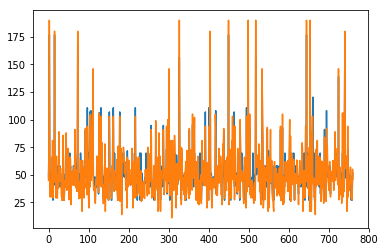

In [77]:
reg = RandomForestRegressor(max_depth=3) 
cross = cross_val_score(reg, features, pm, scoring ='neg_mean_absolute_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.3, random_state =42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_absolute_error(pred, y_test))


In [78]:
## CROSS VALIDATION SCORES 
print(((-1)*cross))

[21.3277796  11.3113236   7.35253286]


In [0]:

with open('/content/RF_Final.bin','wb') as file:
  pickle.dump(reg, file)



In [0]:

for i in range(0,len(pred)):
  print(str(y_test[i]) +'\t'+ str(pred[i]))
  
  

## IMAGE FEATURE EXTRACTION FUNCTIONS

In [0]:
## HAZE DEGREE
def trans_deg(im):
#   im = cv2.imread(img)
#   im = cv2.resize(im, (256,256))
  B=np.zeros((256,256))
  D=np.zeros((256,256))
  C=np.zeros((256,256))
  # 3rd channel or im[2] has been split as b,g,r 

  b,g,r = cv2.split(im)

  for i in range(b.shape[0]):
    for j in range(b.shape[1]):
      D[i][j] = min(b[i][j], g[i][j], r[i][j])
      B[i][j] = max(b[i][j], g[i][j], r[i][j])
      C[i][j] = B[i][j] - D[i][j]

  d = np.sum(D)/float(np.size(D))
  b = np.sum(B)/float(np.size(B))
  c = b-d 
  A = (0.33)*max(np.ndarray.flatten(B)) + (0.66)*b
  
  x1=((A - d)/float(A)) 
  x2=(c/float(A))
  u = 10.127489
  v= -8.336512
  s = 0.13606234
  
  w = math.exp(-0.5*(u*x1 + v*x2)+s)
  
  if(w<=0.1):
      w=0
  elif(w<=0.3):
    w=1
  elif(w<=0.5):
    w=2
  elif(w<=0.7):
    w=3
  elif(w<=0.8):
    w=4
  elif(w<=1.0):
    w=5
    
  return w

In [0]:
## ENTROPY 

def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
## CONTRAST 

def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont